Logistic regression problem.
In case of linear regresion models, the aim is to find the best estimate linear line close to which the predicted points should be (continous prediction) but in case of logistic regresion the aim is to provide a binary decision (yes/no) about examined data point.

Default settings and imports

In [107]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Creating the dataset

In [3]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

Plotting the data with the estimated decision line

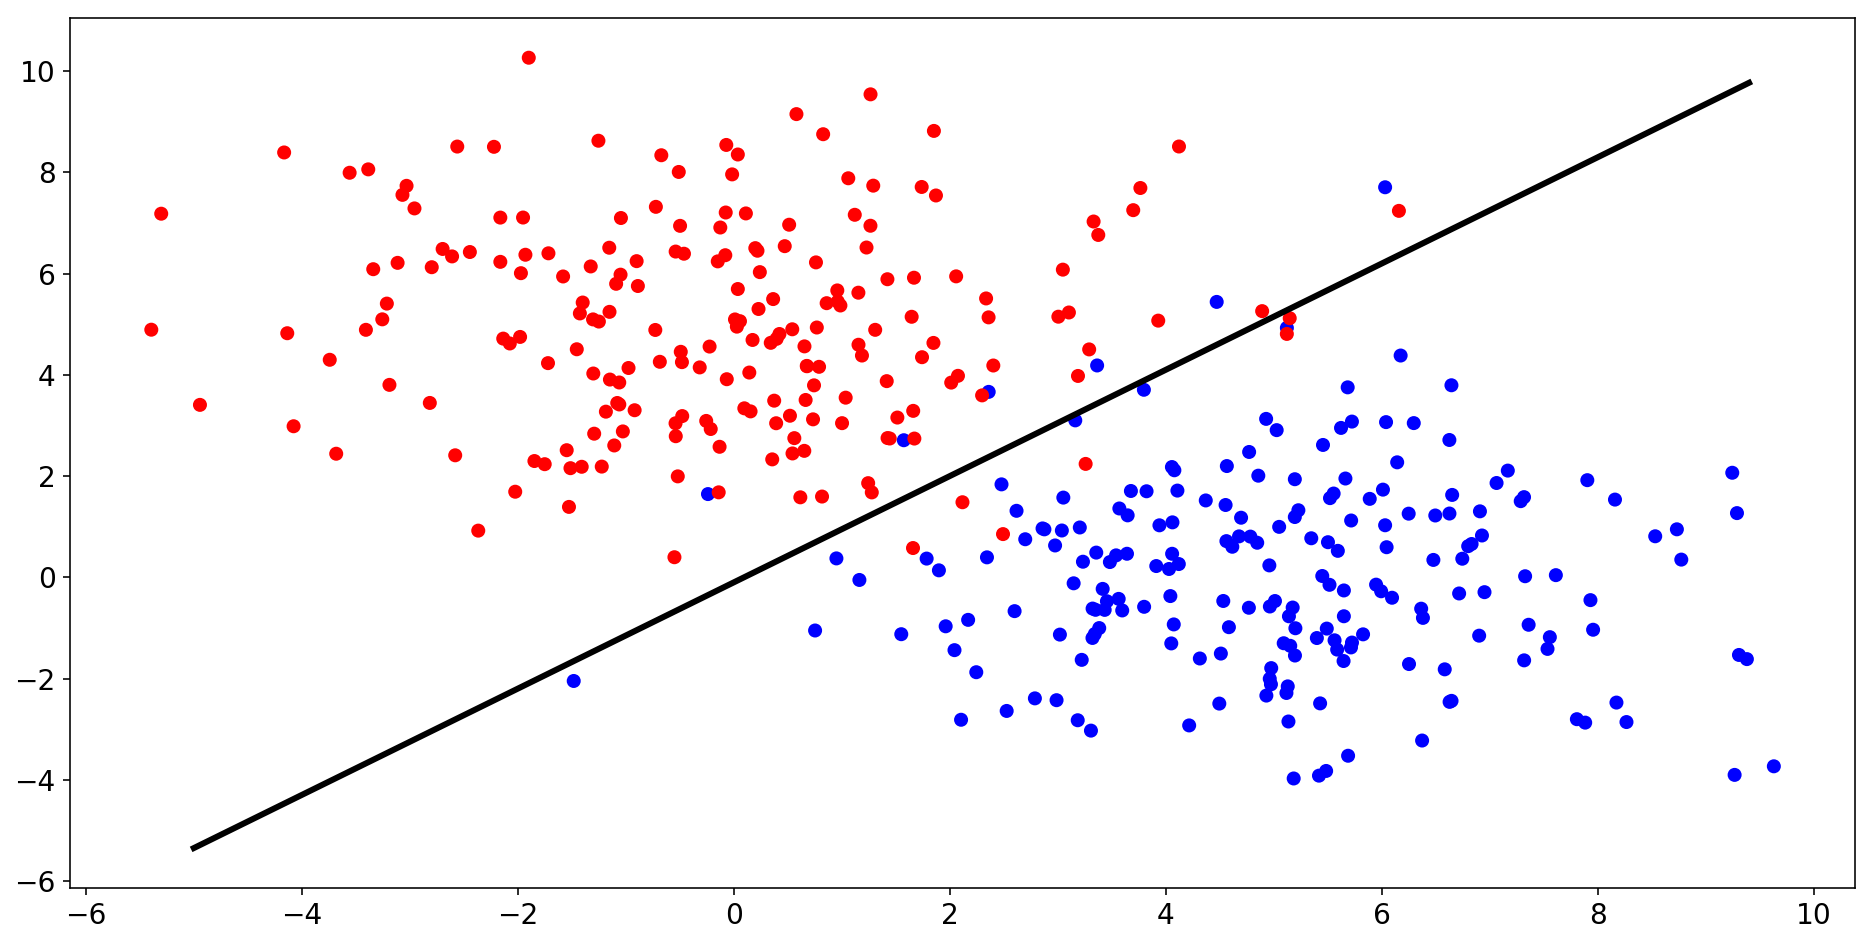

In [70]:
plt.scatter(X[:,0], X[:,1], c=y)
EstimatedLine = np.arange(-5,10,0.6)
plt.plot(EstimatedLine, 1.05*EstimatedLine-0.1, c='k',lw=3)

Line is selected ad hoc testing until there is the number of blue points in the red region (6) is the same as numberr of red points in the blue region (6), the first estimate is based on a personal guess determined by human brain capabilities.

Split data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)



In [14]:
LoR = LogisticRegression()
LoR.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Print coeficients:

In [16]:
print(LoR.coef_)

[[-1.35228416  1.32875899]]


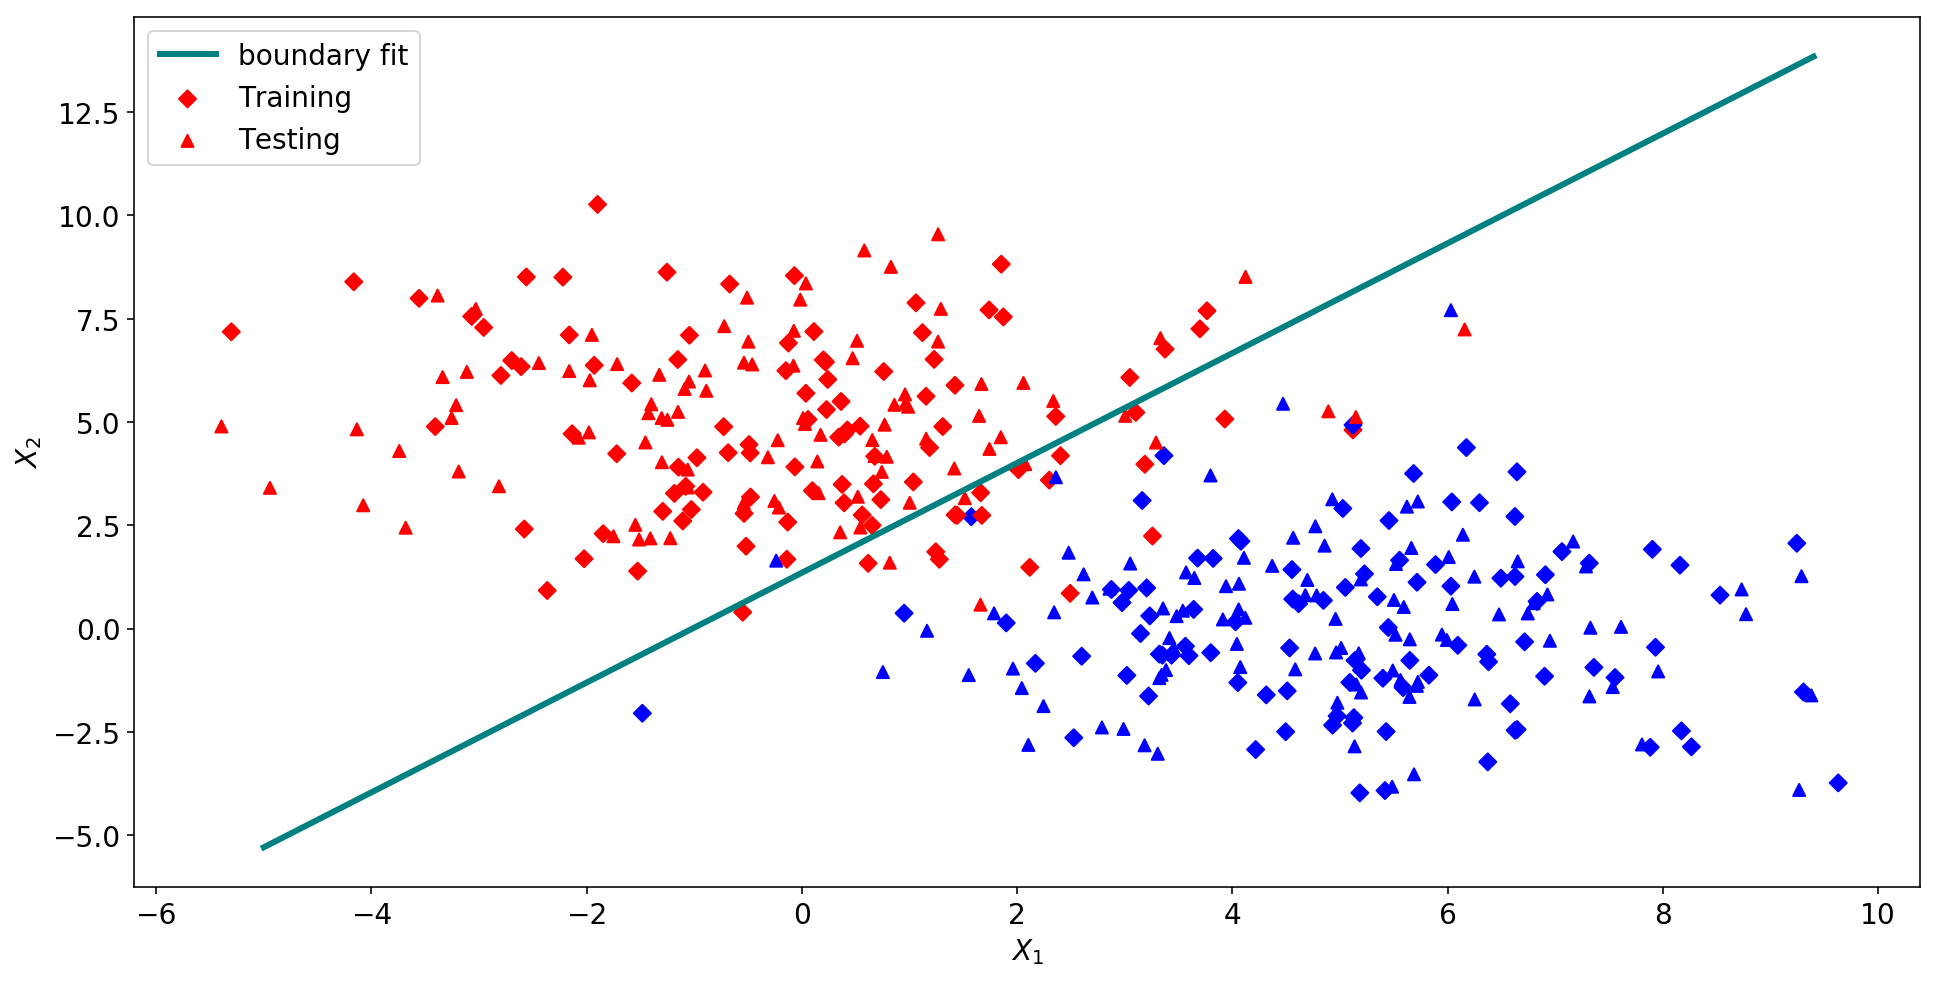

In [45]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='D', label='Training')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^', label ='Testing')

EstimatedLine = np.arange(-5,10,0.6)
plt.plot(EstimatedLine, LoR.coef_[0][1]*EstimatedLine-LoR.coef_[0][0], c='teal',lw=3, label='boundary fit')
plt.legend(loc='best')
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$");

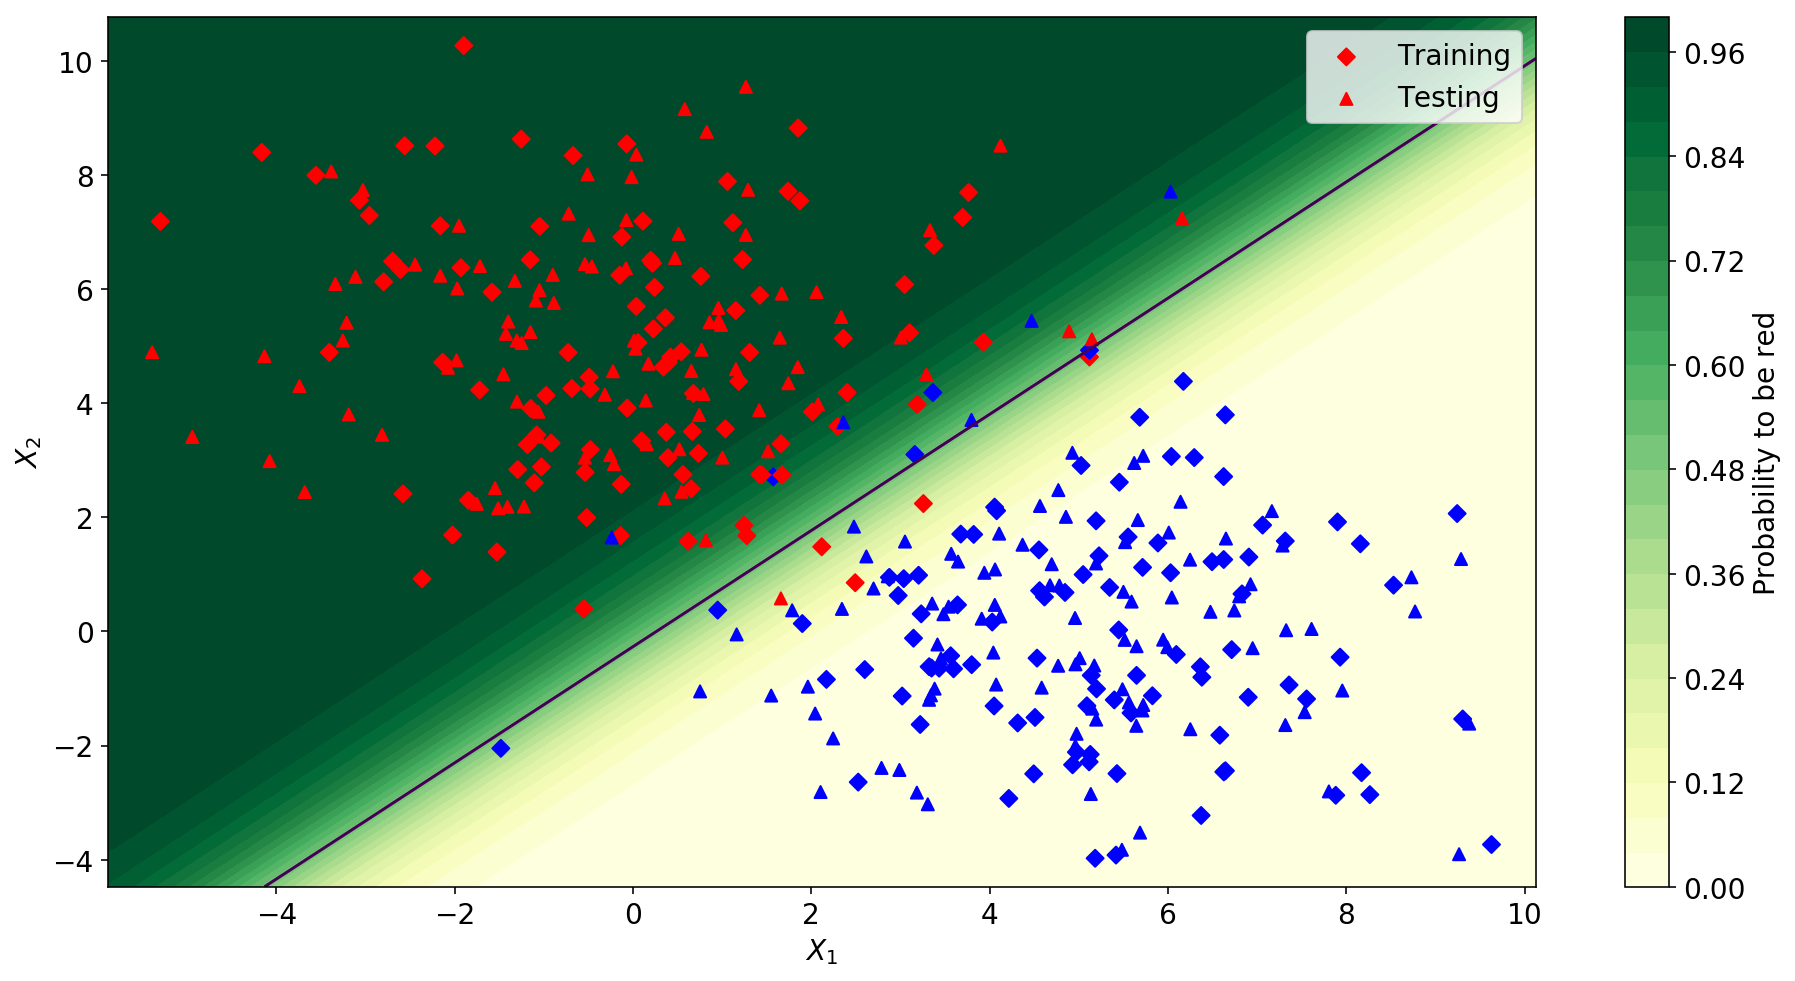

In [92]:
from matplotlib.colors import ListedColormap
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))


Z = LoR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

mpt=plt.contourf(xx, yy, Z , 25, cmap="YlGn", vmin=0, vmax=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='D', label='Training')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^', label ='Testing')
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$");
plt.colorbar(mpt, label="Probability to be red")
plt.legend(loc='best')
plt.contour(xx, yy, Z, levels=[.5])


The boundary represents a line with 50% probability to belong to each group. The distribution of data points determines the location of this line as it is optimized to maximimize number of correct points in the given region and minimize number of wrongly sorted points.

Now, the 20 samples shell be examined in order to see the variation in parameters and the bourder line.

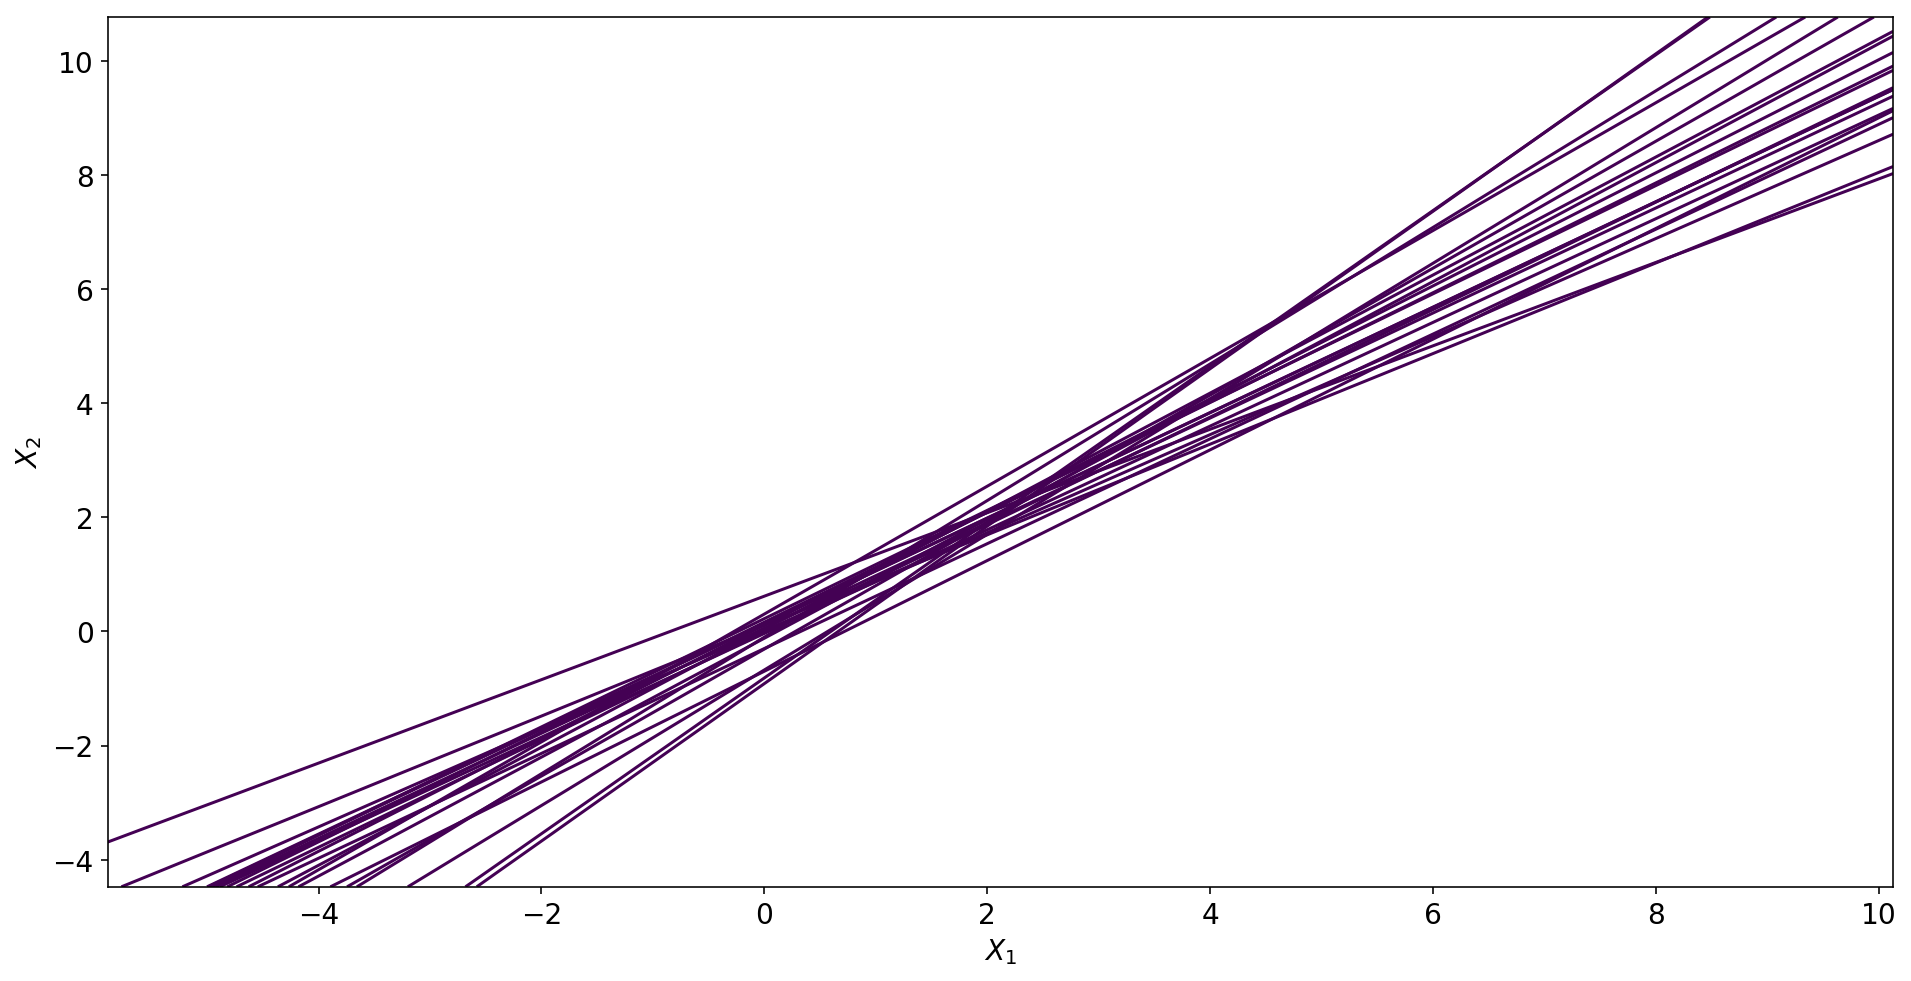

In [100]:
from matplotlib import colors as mcolors
LorParam1=[]
LorParam2=[]
colors = list( dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS) )
for i in range (10,31):
    X, y = make_two_blobs(400,2,i)
    y = np.take(labels, (y < 0.5))
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    LoR = LogisticRegression()
    LoR.fit(X_train, y_train)
    LorParam1.append(LoR.coef_[0][0])
    LorParam2.append(LoR.coef_[0][1])
    
    Z = LoR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[.5],c=colors[2*i], label="sample %i" %i)
    plt.xlabel("$X_{1}$")
    plt.ylabel("$X_{2}$");
    
    
    

Figure above shows the variation of bourder line, figure below show the variation of the parameters as a function of sample.

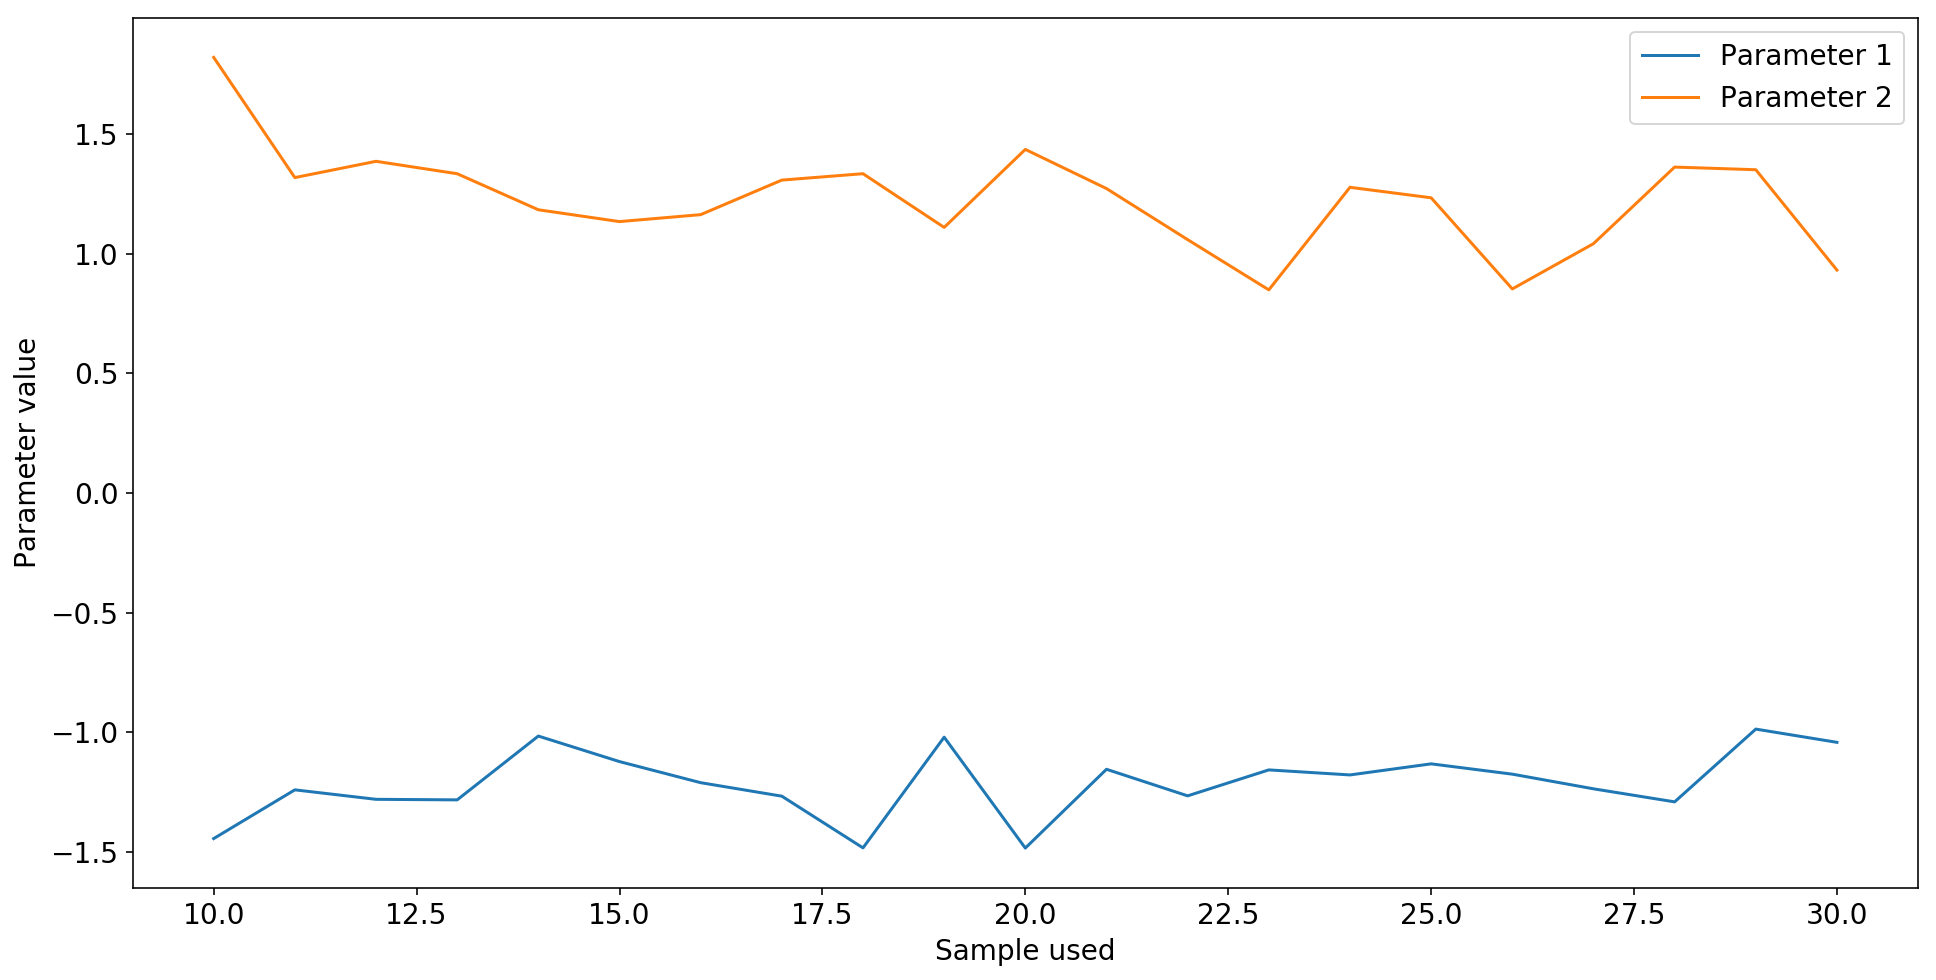

In [106]:
plt.plot(range (10,31), LorParam1,  label='Parameter 1') 
plt.plot(range (10,31), LorParam2,  label='Parameter 2') 
plt.legend(loc='best')
plt.xlabel("Sample used")
plt.ylabel("Parameter value");

As parameters are relatively stable and the model is fairly simple, the model should be a low variance model